# Análisis explotario

La extracción de esta base se realizó el 1 de septiembre.

https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies?resource=download

In [18]:
#Misc
import os
import pickle
import importlib

#Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Visualización
import cufflinks as cf
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones
plt.style.use('seaborn-white')
sns.set(style='white')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
cf.set_config_file(theme='white',dimensions=(650,450))
cf.go_offline()

In [2]:
# Scripts personales
sys.path.insert(1, '../../Datasets/')


import PlotUtils 
importlib.reload(PlotUtils)


<module 'PlotUtils' from 'c:\\Users\\JesúsAdolfoValenciaM\\Diplomado-en-ciencia-de-datos\\Proyecto\\Modulo 5\\M1\\../../Datasets\\PlotUtils.py'>

In [5]:
from stylecloud import gen_stylecloud
from PIL import Image

def get_wordcloud(text, icon="fas fa-comment", background_color=None, output_name="./wordcloud.png"):
    # https://fontawesome.com/icons/alicorn?s=solid
    gen_stylecloud(text=text, icon_name=icon, background_color=background_color, output_name=output_name)
    return Image.open(output_name) 

class TagCloud:
  def __init__(self):
    pass

  def cloud(self, df , var,  icon = "fas fa-video", bc = 'white', q = 0.1 ):
    return get_wordcloud(text = " ".join(df[var].sample(frac = q)),icon = icon,background_color = bc, output_name= "./wordcloud_" + var + '.png')
    

In [6]:
TMDb = pd.read_csv('../../Datasets/TMDb/archive.zip')

In [7]:
TMDb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750318 entries, 0 to 750317
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    750318 non-null  int64  
 1   title                 750314 non-null  object 
 2   genres                527552 non-null  object 
 3   original_language     750318 non-null  object 
 4   overview              627720 non-null  object 
 5   popularity            750318 non-null  float64
 6   production_companies  348017 non-null  object 
 7   release_date          691518 non-null  object 
 8   budget                750318 non-null  float64
 9   revenue               750318 non-null  float64
 10  runtime               710997 non-null  float64
 11  status                750318 non-null  object 
 12  tagline               110743 non-null  object 
 13  vote_average          750318 non-null  float64
 14  vote_count            750318 non-null  float64
 15  

In [8]:
TMDb.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,610150,Dragon Ball Super: Super Hero,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,Shueisha-Fuji Television Network-Toei Animatio...,2022-06-11,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,Masako Nozawa-Toshio Furukawa-Yuko Minaguchi-H...,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg,507086-629015-616037-810693-361743-438148-7788...
1,616037,Thor: Love and Thunder,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,Marvel Studios-Kevin Feige Productions,2022-07-06,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,Chris Hemsworth-Christian Bale-Tessa Thompson-...,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg,2-438148-45920-507086-361743-919355-748918-718...


In [9]:
vars = ['id','genres','original_language','overview','popularity','release_date','budget','revenue','runtime','status','tagline','vote_average','vote_count','keywords','poster_path','backdrop_path']
TMDb = TMDb[vars]
TMDb.head(2)

,id,genres,original_language,overview,popularity,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022-06-11,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022-07-06,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


In [100]:
VA = pd.DataFrame(TMDb.isna().sum(),columns = ['Valores ausentes'])
VA[' '] = TMDb.shape[0]
VA[' '] = VA[' '] - VA['Valores ausentes']
VA = VA.loc[VA['Valores ausentes']>0]
# VA['%'] = round(VA['n']/TMDb.shape[0]*100,2)
VA

,Valores ausentes,
genres,222766,527552
overview,122598,627720
release_date,58800,691518
runtime,39321,710997
tagline,639575,110743
keywords,533514,216804
poster_path,201761,548557
backdrop_path,523454,226864


Text(0.5, 0.92, 'Porcentaje de valores ausentes')

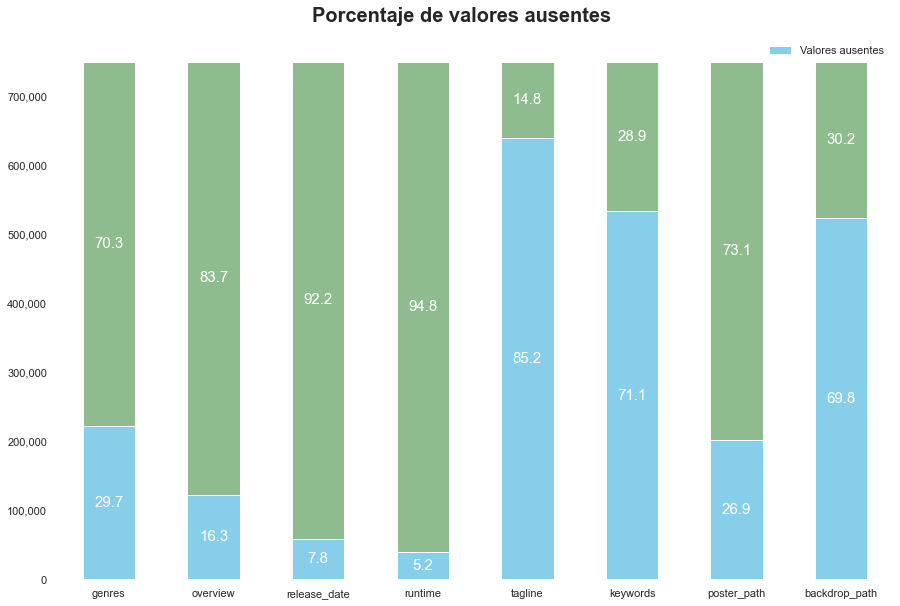

In [148]:

g = VA.plot(kind= 'bar', stacked = True,figsize = (15,10),rot = 0, color={"Valores ausentes": "skyblue", " ": "darkseagreen"})
# g.invert_yaxis()
for c in g.containers:
    # g.bar_label(c,labels=[PlotUtils.formater(x) if x>0 else '' for x in c.datavalues],label_type='center',color='white', fontsize=15)
    g.bar_label(c,labels=[PlotUtils.formater(x/TMDb.shape[0]*100) if x>0 else '' for x in c.datavalues],label_type='center',color='white', fontsize=15)
    # break
sns.despine(bottom = True, left = True)
plt.legend(['Valores ausentes'])
plt.gca().yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(round(y,0)), ',')))
plt.suptitle('Porcentaje de valores ausentes',size=20,fontweight='bold',y=0.92)
# plt.gca().set_xticks([])

In [9]:
VA.to_clipboard()

In [7]:
TMDb['release_date'] = pd.to_datetime(TMDb['release_date'],infer_datetime_format=True)
TMDb['year'] = TMDb['release_date'].dt.year
TMDb['month'] = TMDb['release_date'].dt.month
TMDb['day'] = TMDb['release_date'].dt.day

In [9]:
TMDb = TMDb[vars]
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


In [10]:
um = 'id'
str_vars = ['overview','tagline','keywords']
cat_vars = ['genres','original_language','status']
num_vars = ['popularity','year','month','day','budget','revenue','runtime','vote_average','vote_count']

# Análisis exploratorio

In [11]:
TMDb[cat_vars].describe()

,genres,original_language,status
count,527552,750318,750318
unique,10757,166,6
top,Documentary,en,Released
freq,96647,397679,742354


In [12]:
TMDb[num_vars].describe()

,popularity,year,month,day,budget,revenue,runtime,vote_average,vote_count
count,750318.000000,691518.000000,691518.000000,691518.000000,7.503180e+05,7.503180e+05,7.109970e+05,750318.000000,750318.000000
mean,1.888280,1996.720393,5.917975,12.890759,3.734977e+05,9.303261e+05,1.948804e+02,2.473829,25.533423
std,18.340024,27.742843,3.830143,9.851363,7.923059e+06,2.016022e+07,8.444180e+04,3.178692,356.171585
min,0.600000,1874.000000,1.000000,1.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,0.600000,1984.000000,2.000000,3.000000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,0.600000,2009.000000,6.000000,12.000000,0.000000e+00,0.000000e+00,5.200000e+01,0.000000,0.000000
75%,1.325000,2017.000000,10.000000,21.000000,0.000000e+00,0.000000e+00,9.000000e+01,5.600000,2.000000
max,7294.015000,2049.000000,12.000000,31.000000,5.000000e+09,4.783787e+09,5.050505e+07,10.000000,32169.000000


## Visualización de datos

### Variables categóricas

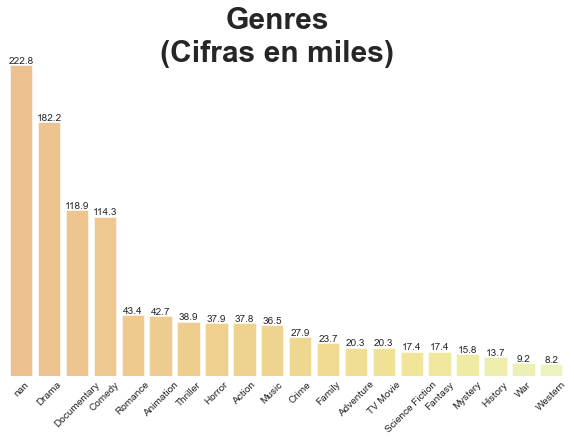

In [18]:
aux = TMDb['genres'].apply(lambda x: str(x).split('-')).explode()
aux = pd.DataFrame(aux,columns = ['genres'])
PlotUtils.bar(aux,'genres',title = 'Genres\n(Cifras en miles)',barlabs=True,format=True,scaled=1000)
plt.xticks(rotation=45,ha='center')
plt.savefig('cat_genres.png')
plt.show()

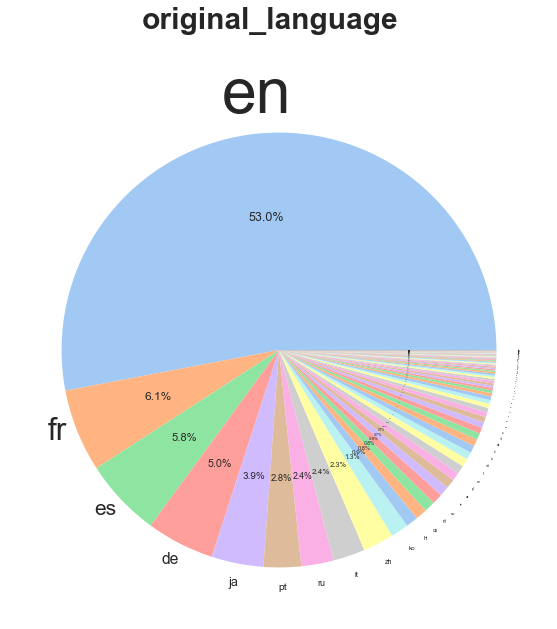

In [25]:
PlotUtils.pie(TMDb,'original_language',legend=False)
plt.savefig('cat_languages.png')

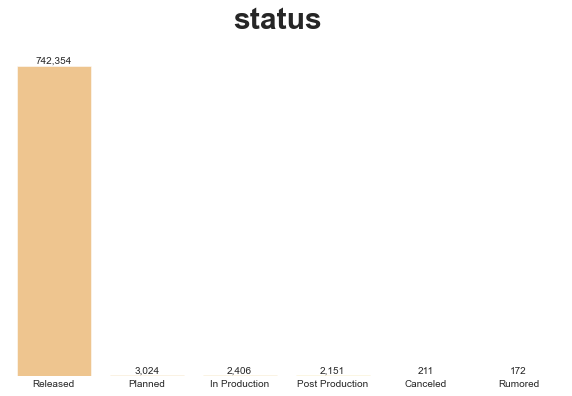

In [20]:
PlotUtils.bar(TMDb,'status',top=10,barlabs=True,format=True)
plt.savefig('cat_status.png')

### Variables numéricas

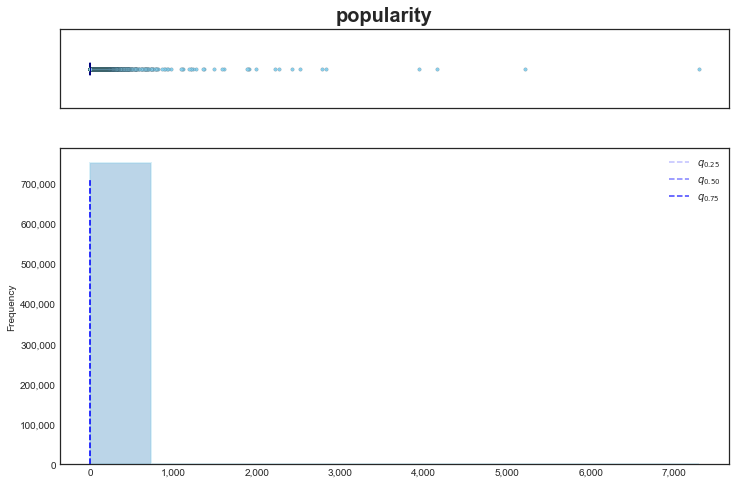

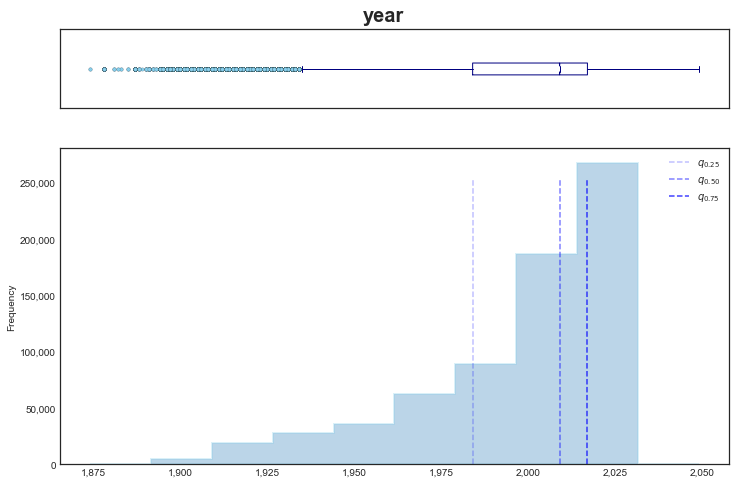

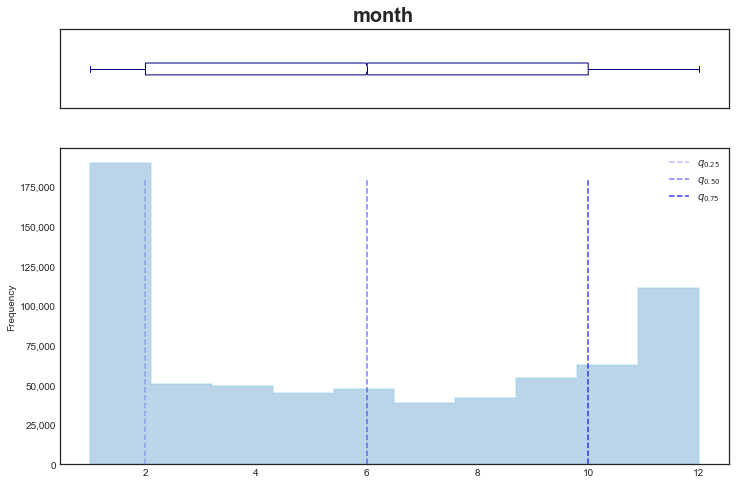

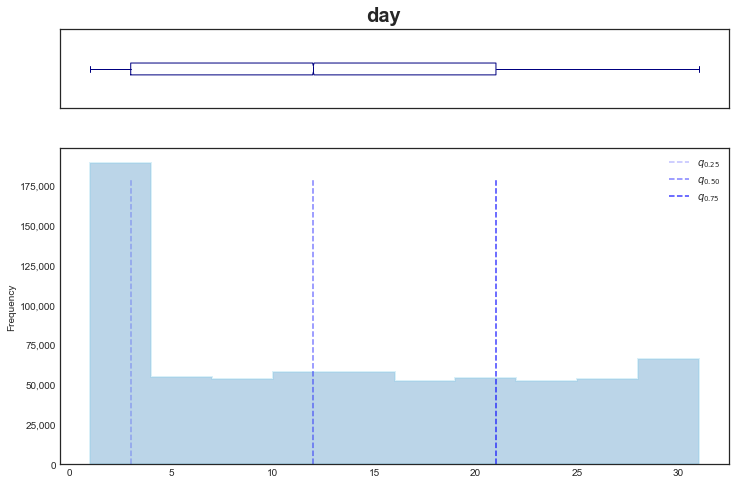

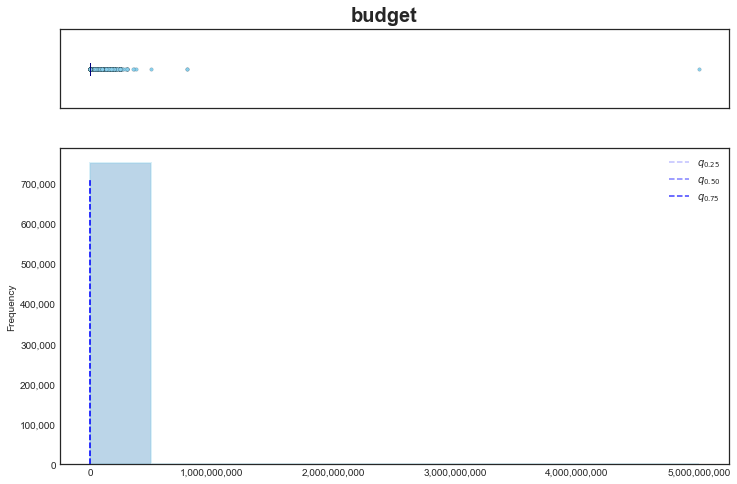

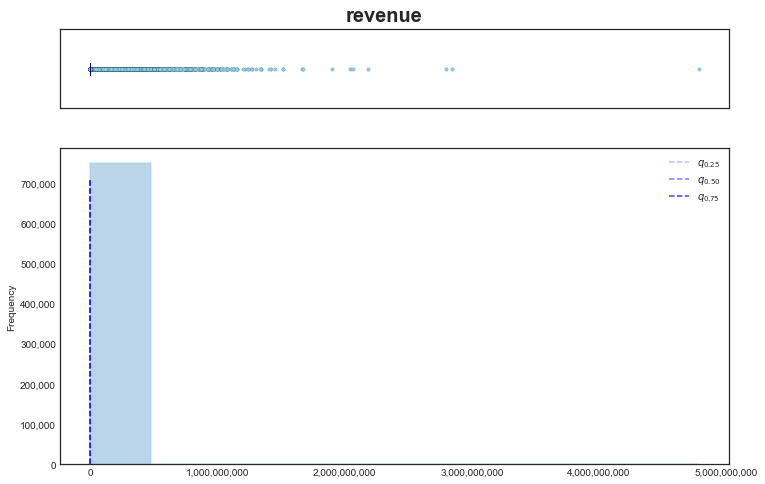

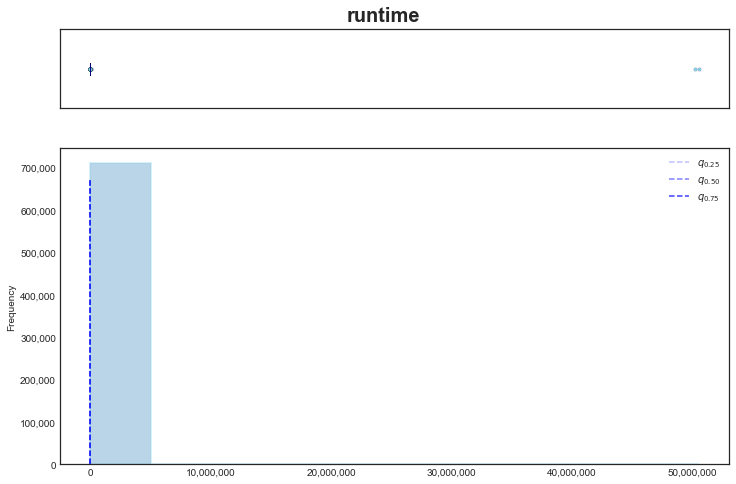

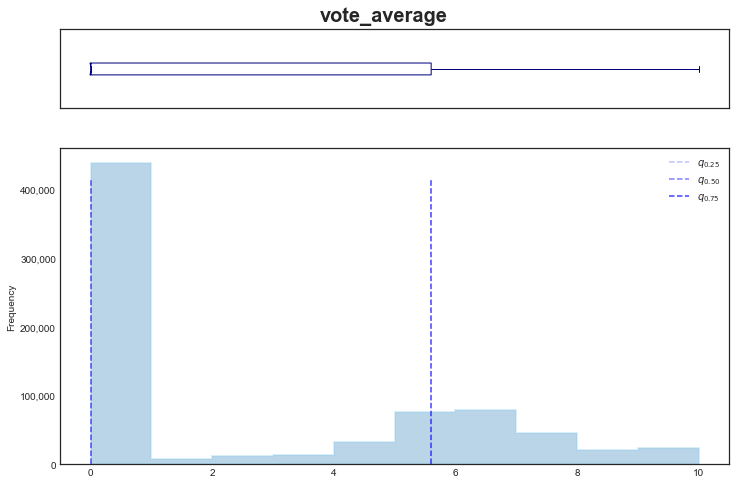

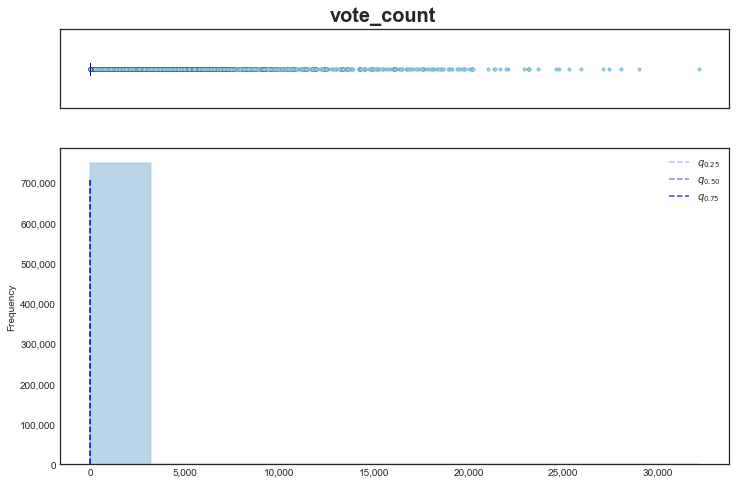

In [22]:
for var in num_vars:
    PlotUtils.hist_box(TMDb,var)
    plt.savefig('num_' + var + '.png')

### Variables caracter

In [11]:
str_vars

['overview', 'tagline', 'keywords']

In [12]:
for var in str_vars:
    TMDb[var] = TMDb[var].astype(str)

In [13]:
str_db = TMDb[str_vars].copy()

str_db['overview_list'] = str_db['overview'].str.split()
str_db['overview_n'] = str_db['overview_list'].str.len()

str_db['tagline_list'] = str_db['tagline'].str.split()
str_db['tagline_n'] = str_db['tagline_list'].str.len()

str_db['keywords'] = str_db['keywords'].str.replace('-',' ')
str_db['keywords_list'] = str_db['keywords'].str.split()
str_db['keywords_n'] = str_db['keywords_list'].str.len()

str_db

,overview,tagline,keywords,overview_list,overview_n,tagline_list,tagline_n,keywords_list,keywords_n
0,The Red Ribbon Army an evil organization that ...,A super awakening and calamity is born.,android sequel attack based on manga fighting ...,"[The, Red, Ribbon, Army, an, evil, organizatio...",44,"[A, super, awakening, and, calamity, is, born.]",7,"[android, sequel, attack, based, on, manga, fi...",11
1,After his retirement is interrupted by Gorr th...,The one is not the only.,ex girlfriend hero greek mythology sequel supe...,"[After, his, retirement, is, interrupted, by, ...",68,"[The, one, is, not, the, only.]",6,"[ex, girlfriend, hero, greek, mythology, seque...",25
2,When danger threatens her camp the fierce and ...,They hunt to live. It lives to hunt.,hunter alien life form prequel alien native am...,"[When, danger, threatens, her, camp, the, fier...",38,"[They, hunt, to, live., It, lives, to, hunt.]",8,"[hunter, alien, life, form, prequel, alien, na...",28
3,When Superman and the rest of the Justice Leag...,"Sit, stay, save the world.",superhero based on comic super power aftercred...,"[When, Superman, and, the, rest, of, the, Just...",48,"[Sit,, stay,, save, the, world.]",5,"[superhero, based, on, comic, super, power, af...",12
4,After more than thirty years of service as one...,Feel the need... The need for speed.,fighter pilot sequel military 空战 us navy pilot,"[After, more, than, thirty, years, of, service...",50,"[Feel, the, need..., The, need, for, speed.]",7,"[fighter, pilot, sequel, military, 空战, us, nav...",8
...,...,...,...,...,...,...,...,...,...
750313,The documentary about Dainis Īvāns leader of t...,nan,nan,"[The, documentary, about, Dainis, Īvāns, leade...",70,[nan],1,[nan],1
750314,SHINE 63 was a professional wrestling event br...,nan,nan,"[SHINE, 63, was, a, professional, wrestling, e...",18,[nan],1,[nan],1
750315,nan,nan,short film,[nan],1,[nan],1,"[short, film]",2
750316,Keeper of Time is a feature length documentary...,nan,nan,"[Keeper, of, Time, is, a, feature, length, doc...",107,[nan],1,[nan],1


In [14]:
TC = TagCloud()

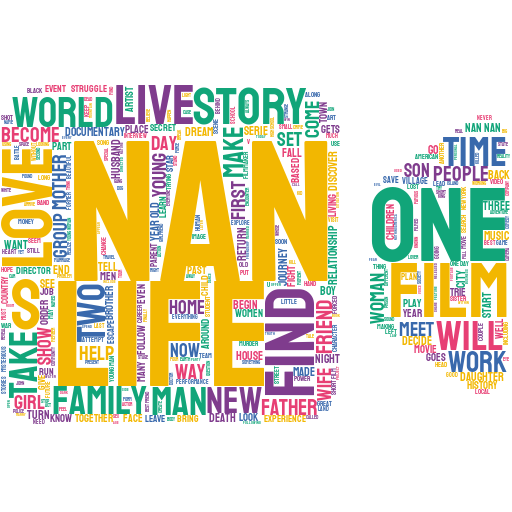

In [15]:
TC.cloud(str_db,'overview')

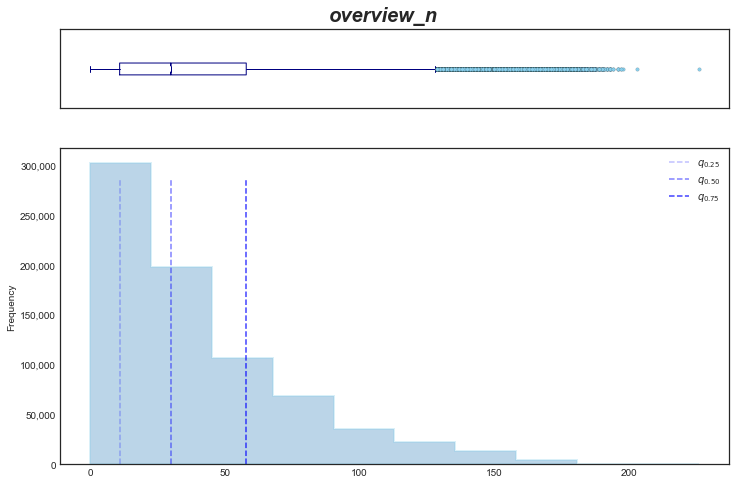

In [19]:
PlotUtils.hist_box(str_db,'overview_n')
plt.savefig('nwords_overview.png')

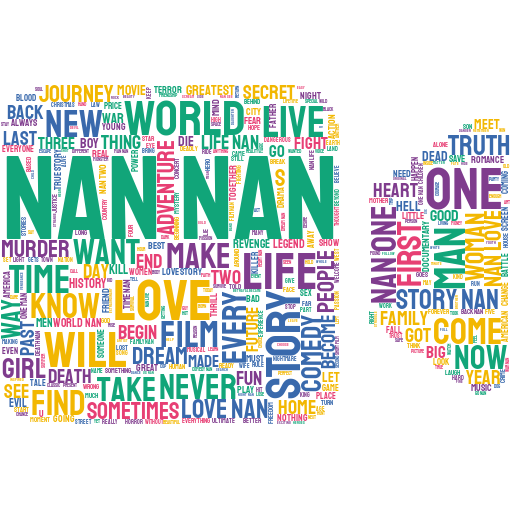

In [16]:
TC.cloud(TMDb,'tagline')

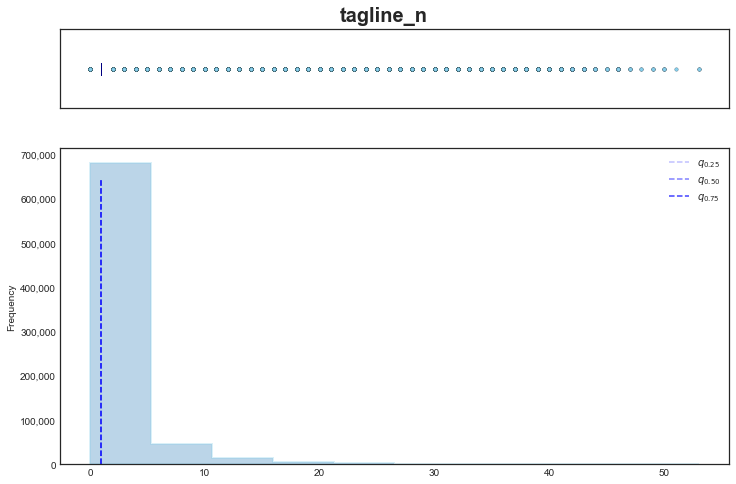

In [23]:
PlotUtils.hist_box(str_db,'tagline_n')
plt.savefig('nwords_tagline.png')

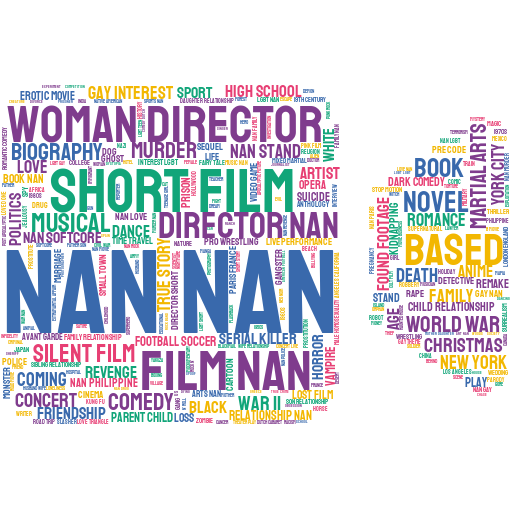

In [17]:
TC.cloud(TMDb,'keywords')

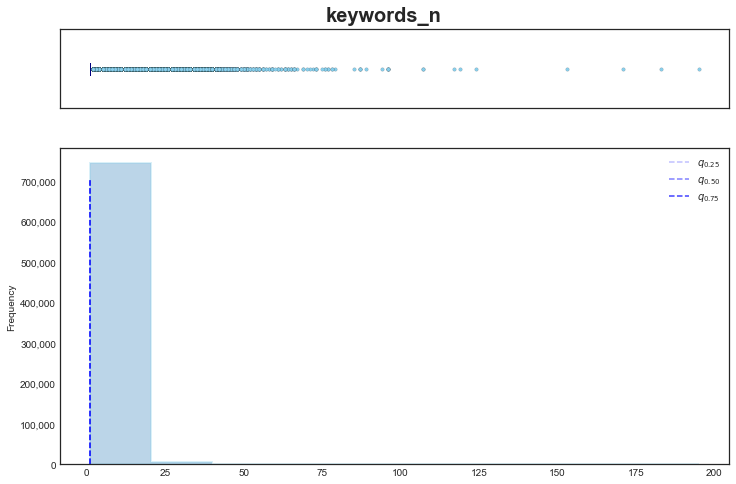

In [24]:
PlotUtils.hist_box(str_db,'keywords_n')
plt.savefig('nwords_keywords.png')

## Procesamiento de datos

In [ ]:
aux = TMDb['revenue'].where(lambda x : x !=0).dropna()
aux = pd.DataFrame(aux,columns = ['revenue'])
hist_box(aux,'revenue',nbins=100)

In [ ]:
aux = TMDb['budget'].where(lambda x : x !=0).dropna()
aux = pd.DataFrame(aux,columns = ['budget'])
hist_box(aux,'budget',nbins=100,logx=True)

In [ ]:
aux = TMDb['vote_count'].where(lambda x : x !=0).dropna()
aux = pd.DataFrame(aux,columns = ['vote_count'])
hist_box(aux,'vote_count',nbins=100,logx=True)

In [ ]:
TMDb.to_feather('DBM1',compression='zstd')